## Descriptive stats

- Visualization Technique
- Measure of Central Tendency
- Measure of Spread
- Covariance and Correlation

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('./data/titanic.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. Working with Qualittative /Categorical Data

## 1. Frequency Distribution table

frequecy tells us how often something happened.

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df[['Pclass']]

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


## lets plot frequency distribution table : Pclass


In [12]:
df[['Pclass']].value_counts()

Pclass
3         491
1         216
2         184
dtype: int64

## Lets plot bar chat, Pclass column

<AxesSubplot:xlabel='Pclass'>

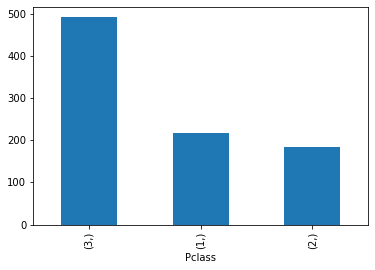

In [15]:
df[['Pclass']].value_counts().plot(kind='bar')

## Pie Chart

<AxesSubplot:ylabel='None'>

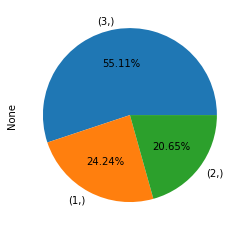

In [18]:
df[['Pclass']].value_counts().plot(kind='pie', autopct = '%0.2f%%')

## 2. Cumulative Frequency

### Cumulative frequency is the running total of previous frequencies

Cumulative frequency is used to determine the number of observations that lie above (or below) a particular value in a data set. The cumulative frequency is calculated using a frequency distribution table. Total sum of percentage of cummulative percentage should sum up to 100%

In [36]:
s = df[['Pclass']].value_counts()
s

Pclass
3         491
1         216
2         184
dtype: int64

In [25]:
percent = ((s/s.sum())*100).values

In [26]:
percent

array([55.10662177, 24.24242424, 20.65095398])

In [27]:
cf = 0
c = []
for i in percent:
    cf=cf+i
    c.append(cf)

In [28]:
c

[55.106621773288445, 79.34904601571269, 100.0]

In [39]:
pd.DataFrame({'Pclass' : s,'Frequey Districution %' : percent,'Cummulative distribution%':c})

,Pclass,Frequey Districution %,Cummulative distribution%
Pclass,,,
3,491,55.106622,55.106622
1,216,24.242424,79.349046
2,184,20.650954,100.000000


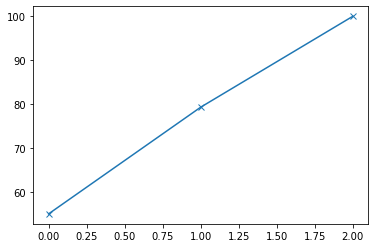

In [40]:
plt.plot(c, marker='x')

# 2. Working with Quantittative /Numerical Data

##  1. Histogram

In [66]:
df.Age.values

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

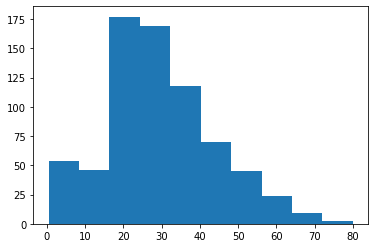

In [48]:
plt.hist(df.Age.values)

## 2. Boxplot

<AxesSubplot:xlabel='Age'>

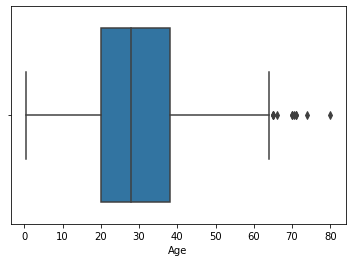

In [51]:
sns.boxplot('Age',data=df)

In [54]:
a = df.dropna(subset =['Age'])
a = a['Age'].values
np.median(a)

28.0

In [59]:
df.Age.quantile(.25) ## first quantile

20.125

In [57]:
df.Age.quantile(.75) ## 3rd quantile

38.0

In [58]:
df.Age.quantile(.50)  ## 2nd quantile is nothing but the median

28.0

In [60]:
df.Age.quantile(1)

80.0

In [61]:
df.Age.quantile(0)

0.42

## OR with numpy


In [64]:
np.quantile(a,0.25)

20.125

In [65]:
np.quantile(a,0.75)

38.0

## 3. Kde plot

<AxesSubplot:xlabel='Age', ylabel='Density'>

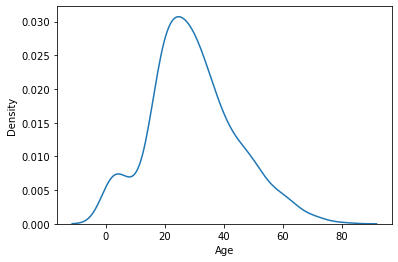

In [67]:
sns.kdeplot(df['Age'])

# 3. Working wiht 2 variable data ( Bivariate Analysis)

## 1. Categorical Vs Numerical

### 1. Box plot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

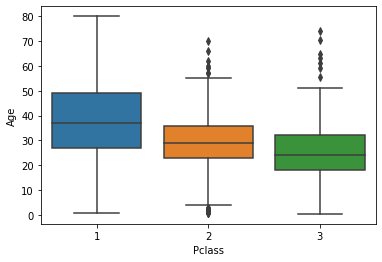

In [68]:
sns.boxplot(x = df['Pclass'],y=df['Age'], data = df)

### 2. Bar plot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

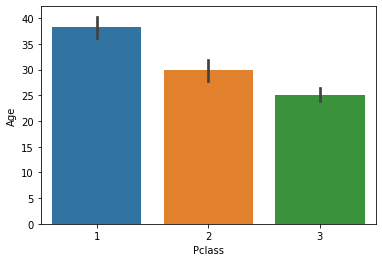

In [69]:
sns.barplot(x='Pclass',y='Age',data=df)

## 2. Numerical Vs Numerical

### 1. Scatter plot

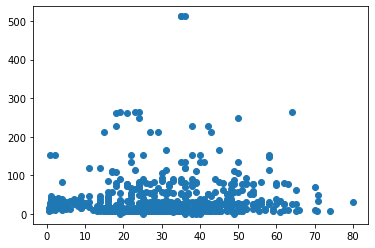

In [70]:
plt.scatter(x = df['Age'],y=df['Fare'])

## 3. Categorical Vs Categorical

### 1. Cross table/Contingency Table

 In Stats, cross table is type pf table in matrix formate, that desplayes the multivariate distribution of the variables

### 1. crosstab

<AxesSubplot:xlabel='Pclass'>

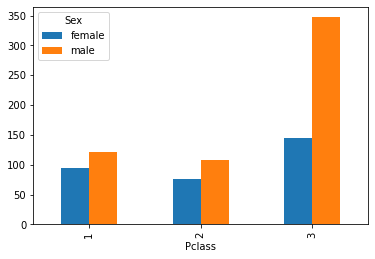

In [74]:
pd.crosstab(df['Pclass'],df['Sex']).plot(kind='bar')

### 2. Heatmap  - density of the numbers

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

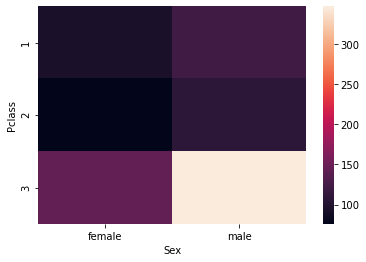

In [77]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Sex']))

<AxesSubplot:>

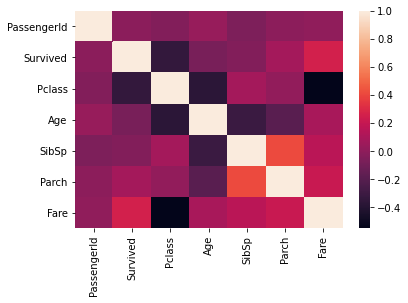

In [78]:
sns.heatmap(df.corr())

# Measure of Central Tendency

In [79]:
iris = sns.load_dataset('iris')

In [80]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [86]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## 1. Mean

### mean of sepal_length

In [90]:
print(np.mean(iris[iris['species']=='setosa']['sepal_length']))
print(np.mean(iris[iris['species']=='versicolor']['sepal_length']))
print(np.mean(iris[iris['species']=='virginica']['sepal_length']))

5.005999999999999
5.936
6.587999999999998


### Mean of sepal width

In [91]:
print(np.mean(iris[iris['species']=='setosa']['sepal_width']))
print(np.mean(iris[iris['species']=='versicolor']['sepal_width']))
print(np.mean(iris[iris['species']=='virginica']['sepal_width']))

3.428000000000001
2.7700000000000005
2.9739999999999998


### Mean of petal length

In [92]:
print(np.mean(iris[iris['species']=='setosa']['petal_length']))
print(np.mean(iris[iris['species']=='versicolor']['petal_length']))
print(np.mean(iris[iris['species']=='virginica']['petal_length']))

1.4620000000000002
4.26
5.552


### Mean of petal width

In [93]:
print(np.mean(iris[iris['species']=='setosa']['petal_width']))
print(np.mean(iris[iris['species']=='versicolor']['petal_width']))
print(np.mean(iris[iris['species']=='virginica']['petal_width']))

0.2459999999999999
1.3259999999999998
2.026


### When not to use Mean??
    - When the data is with outliers, do not consider mean for any further insights, outlier will skew the data

## 2. Median

- Median is the center number when the data are in sorted order
- Median is not affected by outliers since the data is sorted and oitliers are at the end

In [94]:
print(np.median(iris[iris['species']=='setosa']['petal_length']))
print(np.median(iris[iris['species']=='versicolor']['petal_length']))
print(np.median(iris[iris['species']=='virginica']['petal_length']))

1.5
4.35
5.55


## 3. Mode

 - most frequent observation in the data
 

In [98]:
from scipy import stats

In [99]:
print(stats.mode(iris[iris['species']=='setosa']['petal_length']))
print(stats.mode(iris[iris['species']=='versicolor']['petal_length']))
print(stats.mode(iris[iris['species']=='virginica']['petal_length']))

ModeResult(mode=array([1.4]), count=array([13]))
ModeResult(mode=array([4.5]), count=array([7]))
ModeResult(mode=array([5.1]), count=array([7]))


# Measure of Spread

 #### Measure of spread gives is an idea of how much the data is spread or variying
 - Range
 - Interquartile Range
 - Variance
 - Standard Deviation

## 1. Range

 **Range is the difference between maximum and minimum points in the data**

In [102]:
print(np.max(iris[iris['species']=='setosa']['petal_length']) - np.min(iris[iris['species']=='setosa']['petal_length']))

0.8999999999999999


## 2. Percentiles

 -  X percentile means that x% of data points falls below the xth percentile values
    
 - Example : 75 percentile means that 75% of data points falls below 75th percentile value.

In [115]:
mylist = [1,2,3,4,5,6,7,8,9]

print(np.percentile(mylist,80))
print(np.percentile(mylist,50))

7.4
5.0


In [118]:
print(np.percentile(iris[iris['species']=='setosa']['sepal_width'],50))

3.4


## 3. Quartiles

**Quartiles are the values that divide a list of numbers into quaters**

- put the list of numbers in order
- then cut the list into equal parts
- The quartiles are at the cuts

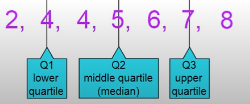

In [123]:
print(np.percentile(iris[iris['species']=='setosa']['sepal_width'],1)) # Min value if the data series
print(np.percentile(iris[iris['species']=='setosa']['sepal_width'],25))
print(np.percentile(iris[iris['species']=='setosa']['sepal_width'],50))  ## median
print(np.percentile(iris[iris['species']=='setosa']['sepal_width'],75))
print(np.percentile(iris[iris['species']=='setosa']['sepal_width'],100)) ## max mumber in the data set

2.594
3.2
3.4
3.6750000000000003
4.4


## 4. Interquartile Range

- The IQR describes the middle 50% of values when ordered from lowest to highest
 - dispersion between upper 75th and lower 50th qusrtiles
 
 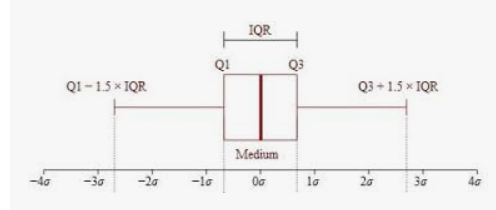
 

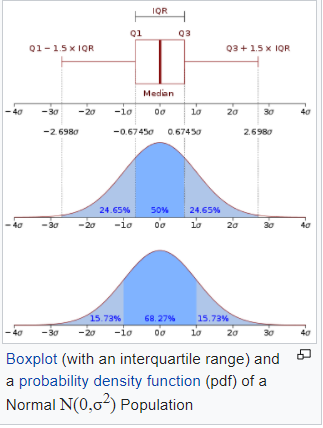

In [126]:
iqr = np.percentile(iris[iris['species']=='setosa']['sepal_width'],75) - np.percentile(iris[iris['species']=='setosa']['sepal_width'],25)

In [127]:
iqr

0.4750000000000001

### 5. Mean Absolute Deviation

 - The absolute deviation from the mean, its the average absolute distance of each point in the set.
 
 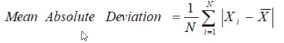
 
 - it is not widely used, since it is not a differenciable

## 6. Variance

 **Variance measures how far are data points spread out from the mean**
 
  - find the mean
  - find the diffrence of each data point with the mean
  - square the difference
  - sum them up
  - take the average 
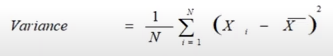



In [128]:
np.var(iris[iris['species']=='setosa']['sepal_width'])

0.14081599999999997

**Variance is not much used in finding the spread of the data, instead Standard deviation is used, That is becuase, the squaring the values will not preserve the scale of the data.if the column data measures in centimeter, squaring them will be in squared centimetrs and there for not the best measurement**

**Variance changes the unit**



## 7 Variance Vs Mean Absolute Deviation

    - Variance uses smooth function and MAD uses not smooth function, smooth functions are easy to defferentiate, and MAD is not differenciable at 0.

## 8. Standard Deviation

    - to over come the problem of unit preserving, we take the square of variance
    
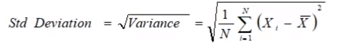

In [129]:
np.std(iris[iris['species']=='setosa']['sepal_width'])

0.3752545802518604

## 9. Meadian absolute Deviation
    - Example
        - 1,3,5,6,7,8,9
        - median is = 6

    - find the median of data set = 6
    - subtract each data point from the median = |1-6|,|3-6|,|5-6|,|6-6|,|7-6|,|8-6|,|9-6|
    - sort the obtained new set of data  = 5,3,1,0,1,2,3 - > 0,1,1,2,3,3,5
    - find the median of t new set = 2

In [131]:
mylist = [1,3,5,6,7,8,9]
np.median(mylist)

2.0

In [135]:
lst = [0,1,1,2,3,3,5]
from statsmodels import robust
robust.mad([1,3,5,6,7,8,9])

2.965204437011204

## Standard Deviation Vs Median Absolute Deviation

- Condider Std deviation if there are no outliers
- use MAD in case of outliers

## Boxbplot

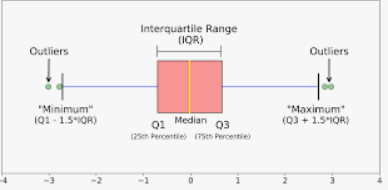